# Image-to-Text Applications

In this notebook we go over some simple applications of image-to-text models. The goal of this notebook is to demonstrate how you would use these pre-trained models out of the box to complete certain tasks. We also provide another notebook that offers instructions on fine-tuning these models if necessary.

For the entirety of this notebook, we use the BLIP model from Salesforce. Specifically, we use blip-image-captioning-base. For production usecases, you might want to consider blip-image-captioning-large. BLIP is a fairly recent model that works well out of the box for many usecases.

# Setup

In [1]:
!pip install transformers

# Imports

In [10]:
from transformers import AutoProcessor, BlipForConditionalGeneration, BlipForQuestionAnswering
import torch
from PIL import Image
import requests

# Common Code

Just things that we reuse for different applications.

### Sample image to use

In [15]:
img_url = "https://rippleprojects.com/wp-content/uploads/2017/06/17050_Ripple_GeorgianPartners8133-e1502909862549-1600x1066.jpg"
image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

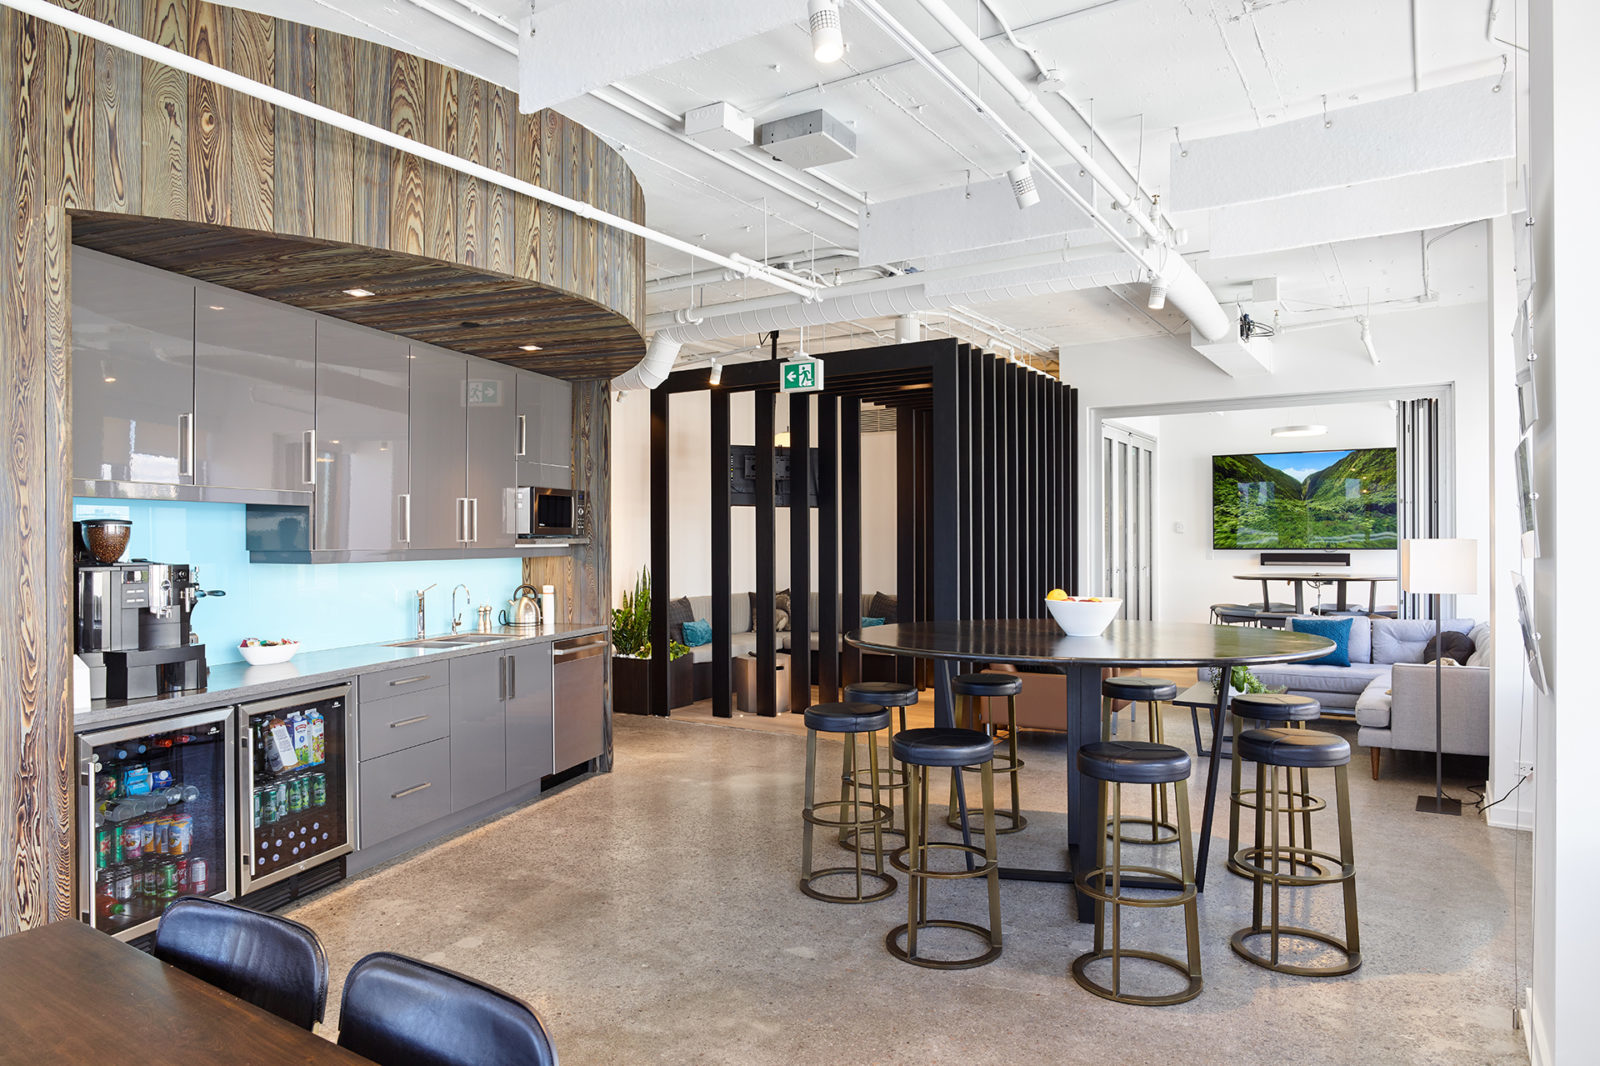

In [16]:
display(image)

### Model setup

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Image Captioning

The overall process is pretty straightforward - we just take an image, pass it through the processor and send it into the model (which has been finetuned for image captioning). The model returns token IDs which we then decode using the processor.

In [18]:
# Create model
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [19]:
inputs = processor(images=image, return_tensors="pt").to(device)
generated_ids = model.generate(**inputs, max_new_tokens=100)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

a kitchen and dining area in a modern office


# Visual Question Answering (VQA)

Same as above but this time we use a model that's been finetuned for VQA.

In [20]:
# Create model
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")
model.to(device)

BlipForQuestionAnswering(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-05, e

In [29]:
prompt = "What is in the upper right corner of the room?"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)
generated_ids = model.generate(**inputs, max_new_tokens=100)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

television
